<a href="https://colab.research.google.com/github/hazal-usta/Twitter-HateSpeechDetection-TurkishTweets/blob/main/SMA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize


In [ ]:
#download("popular") # Popular datasets
#download('tagsets') # Tagsets for POS tagging
#download('vader_lexicon') # Lexicon for sentiment analysis

In [ ]:
trcorpus_df = pd.read_csv('turkcecorpus.tsv', sep='\t')
trcorpus_df.shape
trcorpus_df

,id,timestamp,text,label
0,973568937593065472,1520952977415,@USER06095 Hırsız demişken Tuncay sizin şu 1.2...,grp
1,973568937723035648,1520952977446,Ne bileyim sen hastayım deyince bende veterine...,ind
2,973568937911873536,1520952977491,Akşam eve gittiğimizde yorgunluğuma iyi gelece...,grp
3,973568939925090304,1520952977971,Kook’un sesini 18381 kez dinledikten sonra eğe...,prof
4,973568940667539457,1520952978148,@USER05270 @USER04816 o macta adam 6 7 tane ne...,grp
...,...,...,...,...
35279,1178770821470412806,1569876918998,Great Priest elmalara pot basıyor,non
35280,1178772855028436993,1569877403836,Alkollüyken yazmaya harika bir çözüm sunuyorum...,non
35281,1178774590958559234,1569877817714,@USER10875 Cvp vermek istemedim ama dayanamıyo...,ind
35282,1178780674305777665,1569879268097,Bazı takip ettiğim kişileri aha bu da hasta am...,ind


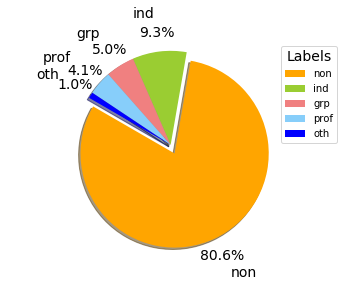

In [ ]:
labels = trcorpus_df['label'].value_counts().index
percents = trcorpus_df['label'].value_counts().values

colors = ['orange', 'yellowgreen', 'lightcoral', 'lightskyblue', 'blue']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(percents, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=150, radius=1, pctdistance=1.2, labeldistance=1.4, textprops={'fontsize': 14})
plt.legend(labels, loc="best", title="Labels", title_fontsize=14)

plt.axis('equal')
plt.show()

In [ ]:
from nltk.tokenize import TweetTokenizer

# This tokenizer will tokenize tweets. "preserve_case" parameter can be used to
# preserve cases or make it all lowercase. "reduce_len" parameter shortens
# consecutive character repetitions to at most three consecutive repetitions to
# reduce noise.
tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True)

for tweet in trcorpus_df["text"].head():
    print(tweet,"\n└─>",tokenizer.tokenize(tweet),"\n")

@USER06095 Hırsız demişken Tuncay sizin şu 1.200 bin TL'lik faturayı naptınız malum MİLLETE kitlesiniz ya, sizden âlâ HIRSIZ varmı bu ülkede banka soyarken kâr MASKESİ ülke soyarken Atatürk'ün MASKESİ çoooooookk yüzsünüz CHP OLARAK... 
└─> ['@user06095', 'hırsız', 'demişken', 'tuncay', 'sizin', 'şu', '1.200', 'bin', "tl'lik", 'faturayı', 'naptınız', 'malum', 'mi̇llete', 'kitlesiniz', 'ya', ',', 'sizden', 'âlâ', 'hirsiz', 'varmı', 'bu', 'ülkede', 'banka', 'soyarken', 'kâr', 'maskesi̇', 'ülke', 'soyarken', "atatürk'ün", 'maskesi̇', 'çoookk', 'yüzsünüz', 'chp', 'olarak', '...'] 

Ne bileyim sen hastayım deyince bende veteriner okumaya karar verdim 
└─> ['ne', 'bileyim', 'sen', 'hastayım', 'deyince', 'bende', 'veteriner', 'okumaya', 'karar', 'verdim'] 

Akşam eve gittiğimizde yorgunluğuma iyi gelecek bi bayan olmalı evde 
└─> ['akşam', 'eve', 'gittiğimizde', 'yorgunluğuma', 'iyi', 'gelecek', 'bi', 'bayan', 'olmalı', 'evde'] 

Kook’un sesini 18381 kez dinledikten sonra eğer devam edersem ağ

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

lemmatizer = WordNetLemmatizer()

def get_lemmatizer_pos(pos):
    pos_start = pos[0] # Takes the first letter to simplify the POS tag
    if pos_start == "J":
        return wn.ADJ
    elif pos_start == "V":
        return wn.VERB
    elif pos_start == "R":
        return wn.ADV
    else:
        return wn.NOUN

In [ ]:
from nltk import pos_tag
from nltk.sentiment.util import mark_negation

for tweet in trcorpus_df:
    tweet_tokens_pos = pos_tag(tokenizer.tokenize(tweet))
    tweet_lemmas = [lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in tweet_tokens_pos]
    # Negations are marked here:
    tweet_lemmas_negated = mark_negation(tweet_lemmas)
    print(tweet_lemmas_negated)

['id']
['timestamp']
['text']
['label']


In [ ]:
from nltk.corpus import stopwords
import sys
import re
import nltk.data
from nltk import pos_tag_sents
# Tries to import autocorrect and emoji packages. If you have Anaconda, you can install
# emoji using "conda install -c conda-forge emoji" command. You can download autocorrect
# using pip and "target" parameter: "pip install autocorrect --target=<directory>"
try:
    from autocorrect import Speller
    from emoji import get_emoji_regexp
except:
    print(sys.exc_info()[0])
    print("WARNING: Probable missing packages, you may not be able to remove emojis or autocorrect texts.")

# Note that it looks like the POS tagger prefers us to feed sentences separately (or
# feed them as a list to pos_tag_sents()). Therefore, we will tokenize sentences first.
# Sentence tokenizer tokenizes sentences while also trying to handle periods that do not
# function as a sentence terminator (such as the period in "Mr.").
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# This function wraps up all the processes and returns normalized tweets (optionally with
# bigrams). It has some parameters you can play with. To keep it monolithic and easier to
# analyze, it is written as a one big function. From a software engineering perspective,
# it would make more sense to move certain parts to their own functions to separate
# different concerns (subtasks) such as emoji removal, punctutation removal, etc. The
# function also has tokenizer parameters that have default values, which make sure that
# these objects exist when it needs them. You can also include import statements and such
# in the function to make it more portable, or you could make it a module.
def tokenize_normalize(tweet, sentence_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle'),
                       tokenizer=TweetTokenizer(preserve_case=False), return_bigrams=False,
                       tokenize_numbers=False, tokenize_users=False, tokenize_hashtags=False,
                       tokenize_urls=False, remove_emoji=True, remove_punct=True,
                       handle_negation=True, autocorrect=False):

    # This retrieves a list of stop words in English, which will be used to remove the
    # stop words:
    stop_words = stopwords.words("turkish")

    # These combined punctuations will be used to remove punctuations from tweets (it
    # is an extension to string.punctuation):
    punctuations = "!\"“”#$%&'‘’()*+,-./:;<=>?@[\]^_`{|}~‍"

    # We will use this function to correct typographic errors:
    if autocorrect and "autocorrect" in sys.modules:
        spell = Speller()

    # Separates tweets into sentences:
    tweet_sentences = sentence_tokenizer.tokenize(tweet)

    # Tokenization outputs are kept in separate lists for each sentence:
    tweet_sentences_tokens = [tokenizer.tokenize(sentence) for sentence in tweet_sentences]

    # POS tagging happens separately for each sentence before they are combined:
    tokens_pos = [pos_tag for pos_tags in pos_tag_sents(tweet_sentences_tokens) for pos_tag in pos_tags]

    # For each POS-tagged token, a lemma is obtained:
    lemmas = [lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in tokens_pos]
#     print(lemmas)

    # Marks negations:
    if handle_negation:
        lemmas = mark_negation(lemmas)

    filtered_lemmas = []
    bigrams = []
    last_filtered_lemma_index = None
    last_filtered_lemma = None
    for lemma_index, lemma in enumerate(lemmas):

        # The amount of emojis has skyrocketed, and the way new emojis or their
        # varients are added technically complicates handling emojis. For example,
        # some emojis are formed by combining different emojis and a zero-width joiner
        # in between. Removing variation selectors such as hair/skin color and gender
        # for emojis since they cause noise and tokenization problems:
        if re.sub("[\\uFE00-\\uFE0F♂♀‍]+", "", lemma) == "":
            continue

        # Filters hashtags:
        if lemma.startswith("#"):
            if tokenize_hashtags:
                lemma = "<hashtag>"
            else:
                continue

        # Filters user handles:
        if lemma.startswith("@"):
            if tokenize_users:
                lemma = "<user>"
            else:
                continue

        # Filters stop words (considers negations):
        if lemma.replace("_NEG", "") in stop_words:
            continue

        # Filters the lemma by searching for "https://," "http://," or "www." using
        # regular expression. If one of them exists, they are not retrieved. Regular
        # expression may seem daunting at first. It is not mandatory, but you can check
        # tutorials like this: https://regexone.com/lesson/introduction_abcs
        if re.search("(https?:\/\/)|(www\.)", lemma):
            if tokenize_urls:
                lemma = "<url>"
            else:
                continue

        # Filters emojis using emeji package (considers negations):
        if remove_emoji and "emoji" in sys.modules:
            lemma = get_emoji_regexp().sub(u'', lemma.replace("_NEG", ""))

        # Filters punctuation (considers negations):
        if remove_punct and lemma.replace("_NEG", "").translate(lemma.replace("_NEG", "").maketrans('', '', punctuations)) == "":
            continue

        # Corrects typographic errors using autocorrect package (considers negations):
        if autocorrect and "autocorrect" in sys.modules and spell:
            if "_NEG" in lemma:
                # Removing "_NEG" and adding it back after autocorrection:
                lemma_autocorrected = spell(lemma.replace("_NEG", "")).join("_NEG")
            else:
                lemma_autocorrected = spell(lemma)

            if lemma != lemma_autocorrected:
#                 print(lemma,"autocorrected to",lemma_autocorrected) # Uncomment this line to print the corrections
                lemma = lemma_autocorrected

        # Tries to convert a number from string to float while also handling commas
        # and percentage signs. If the token is a number, it is transformed to "<number>"
        # token or not retrieved. If not, it silently ignores the exception and
        # continues.
        try:
            float(lemma.replace(",", "").replace("%", ""))
            if tokenize_numbers:
                lemma = "<number>"
            else:
                continue
        except:
            pass

        # If the lemma survives all these processes, it is appended to the list
        filtered_lemmas.append(lemma)

        # If returning bigrams is set to True, this part extracts the bigrams:
        if return_bigrams:
            # If there is a last filtered lemma, if its location in the sentences is
            # right before the current lemma, and if the current lemma is not a
            # punctuation:
            if last_filtered_lemma and last_filtered_lemma_index + 1 == lemma_index and\
            lemma.replace("_NEG", "").translate(lemma.replace("_NEG", "").maketrans('', '', punctuations)) != "":
                # The lemma group (bigram) is appended to the bigram list
                bigrams.append([last_filtered_lemma, lemma])

            last_filtered_lemma_index = lemma_index
            last_filtered_lemma = lemma

    if return_bigrams:
        # It returns filtered lemmas and bigrams together
        return (filtered_lemmas, bigrams)
    else:
        return filtered_lemmas

In [ ]:
# Normalizes tweets and retrieves bigrams as well:
trcorpus_df["text_processed"], trcorpus_df["text_bigrams"] = map(list, zip(*[tokenize_normalize(text, return_bigrams=True) for text in trcorpus_df["text"].values.tolist()]))
trcorpus_df[["text", "text_processed", "text_bigrams"]].head(n=20)

,text,text_processed,text_bigrams
0,@USER06095 Hırsız demişken Tuncay sizin şu 1.2...,"[hırsız, demişken, tuncay, sizin, bin, tl'lik,...","[[hırsız, demişken], [demişken, tuncay], [tunc..."
1,Ne bileyim sen hastayım deyince bende veterine...,"[bileyim, sen, hastayım, deyince, bende, veter...","[[bileyim, sen], [sen, hastayım], [hastayım, d..."
2,Akşam eve gittiğimizde yorgunluğuma iyi gelece...,"[akşam, eve, gittiğimizde, yorgunluğuma, iyi, ...","[[akşam, eve], [eve, gittiğimizde], [gittiğimi..."
3,Kook’un sesini 18381 kez dinledikten sonra eğe...,"[kook, un, sesini, dinledikten, sonra, devam, ...","[[un, sesini], [dinledikten, sonra], [devam, e..."
4,@USER05270 @USER04816 o macta adam 6 7 tane ne...,"[macta, adam, tane, net, sut, cikartti, aksini...","[[macta, adam], [tane, net], [net, sut], [sut,..."
5,#BimVeA101deMazotSatılsın Bim ve a101 kaliteli...,"[bim, a101, kaliteli, ürün, satıyor, diyen, a,...","[[a101, kaliteli], [kaliteli, ürün], [ürün, sa..."
6,Xiumin tam 1 keş. Ne kadar içiyorsa artık insa...,"[xiumin, tam, keş, kadar, içiyorsa, artık, ins...","[[xiumin, tam], [kadar, içiyorsa], [içiyorsa, ..."
7,@USER02584 @USER09450 Kahvehanede çok muhabbet...,"[kahvehanede, muhabbet, etmişsin, desteksiz, a...","[[muhabbet, etmişsin], [desteksiz, at.yav], [a..."
8,@USER04185 Ondan sonra bu sapık adam sikini ba...,"[ondan, sonra, sapık, adam, sikini, bana, sürttü]","[[ondan, sonra], [sapık, adam], [adam, sikini]..."
9,"Herkes aşk acısı çeker,herkes ihanete ugrar, h...","[herkes, aşk, acısı, çeker, herkes, ihanete, u...","[[herkes, aşk], [aşk, acısı], [acısı, çeker], ..."


In [ ]:
# Flattening the lists together and counting the values:
terms = pd.Series(trcorpus_df.explode('text_processed').text_processed).value_counts()

terms.head(n=50)

bir       8080
ben       2862
var       2513
kadar     2299
yok       2041
bi        1983
değil     1774
mi        1537
sen       1496
güzel     1462
olsun     1374
sonra     1337
iyi       1312
bile      1101
artık     1091
böyle     1077
benim      920
bana       908
olan       903
olur       885
zaman      877
seni       848
olarak     840
yine       809
allah      808
beni       802
sana       799
sadece     789
gün        786
öyle       754
senin      741
zaten      737
şimdi      730
tek        720
oldu       713
bunu       672
büyük      662
önce       659
insan      610
kendi      572
aynı       570
adam       551
başka      548
bugün      527
son        521
bizim      507
herkes     505
biraz      500
sizin      498
bence      480
Name: text_processed, dtype: int64

In [ ]:
# Flattening the lists together, joining bigram list elements, and counting the values:
bigrams = pd.Series([bigram[0]+" - "+bigram[1] for bigram in trcorpus_df.explode("text_bigrams").text_bigrams.to_list() if type(bigram) == list]).value_counts().head(n=50)

bigrams.head(n=50)

değil - mi           198
bir - gün            177
güzel - bir          146
böyle - bir          142
başka - bir          134
teşekkür - ederim    129
gerek - yok          106
bir - şekilde         99
öyle - bir            92
geçmiş - olsun        91
kutlu - olsun         85
büyük - bir           85
iyi - geceler         77
olursa - olsun        76
bir - insan           74
tek - bir             65
seni - seviyorum      65
bir - şeyler          65
yeni - bir            65
ben - sana            65
devam - ediyor        63
iyi - bir             60
tam - olarak          57
sonuna - kadar        56
merak - ediyorum      55
helal - olsun         54
bir - tane            52
nefret - ediyorum     51
razı - olsun          51
yazıklar - olsun      50
bir - an              50
bir - kere            50
bir - tek             49
bundan - sonra        49
ali - koç             48
herhangi - bir        47
ak - parti            47
özür - dilerim        44
kadar - güzel         44
saçma - sapan         43


In [ ]:
trcorpus_df['timestamp'] = pd.to_datetime(trcorpus_df['timestamp'], unit='ms')
trcorpus_df['mnth_yr'] = trcorpus_df['timestamp'].apply(lambda x: x.strftime('%B-%Y'))

trcorpus_df.head(20)

,id,timestamp,text,label,text_processed,text_bigrams,mnth_yr
0,973568937593065472,2018-03-13 14:56:17.415,@USER06095 Hırsız demişken Tuncay sizin şu 1.2...,grp,"[hırsız, demişken, tuncay, sizin, bin, tl'lik,...","[[hırsız, demişken], [demişken, tuncay], [tunc...",March-2018
1,973568937723035648,2018-03-13 14:56:17.446,Ne bileyim sen hastayım deyince bende veterine...,ind,"[bileyim, sen, hastayım, deyince, bende, veter...","[[bileyim, sen], [sen, hastayım], [hastayım, d...",March-2018
2,973568937911873536,2018-03-13 14:56:17.491,Akşam eve gittiğimizde yorgunluğuma iyi gelece...,grp,"[akşam, eve, gittiğimizde, yorgunluğuma, iyi, ...","[[akşam, eve], [eve, gittiğimizde], [gittiğimi...",March-2018
3,973568939925090304,2018-03-13 14:56:17.971,Kook’un sesini 18381 kez dinledikten sonra eğe...,prof,"[kook, un, sesini, dinledikten, sonra, devam, ...","[[un, sesini], [dinledikten, sonra], [devam, e...",March-2018
4,973568940667539457,2018-03-13 14:56:18.148,@USER05270 @USER04816 o macta adam 6 7 tane ne...,grp,"[macta, adam, tane, net, sut, cikartti, aksini...","[[macta, adam], [tane, net], [net, sut], [sut,...",March-2018
5,973568943834222592,2018-03-13 14:56:18.903,#BimVeA101deMazotSatılsın Bim ve a101 kaliteli...,grp,"[bim, a101, kaliteli, ürün, satıyor, diyen, a,...","[[a101, kaliteli], [kaliteli, ürün], [ürün, sa...",March-2018
6,973568944576585728,2018-03-13 14:56:19.080,Xiumin tam 1 keş. Ne kadar içiyorsa artık insa...,non,"[xiumin, tam, keş, kadar, içiyorsa, artık, ins...","[[xiumin, tam], [kadar, içiyorsa], [içiyorsa, ...",March-2018
7,973568946086535170,2018-03-13 14:56:19.440,@USER02584 @USER09450 Kahvehanede çok muhabbet...,ind,"[kahvehanede, muhabbet, etmişsin, desteksiz, a...","[[muhabbet, etmişsin], [desteksiz, at.yav], [a...",March-2018
8,973568950842871810,2018-03-13 14:56:20.574,@USER04185 Ondan sonra bu sapık adam sikini ba...,ind,"[ondan, sonra, sapık, adam, sikini, bana, sürttü]","[[ondan, sonra], [sapık, adam], [adam, sikini]...",March-2018
9,973568957067223040,2018-03-13 14:56:22.058,"Herkes aşk acısı çeker,herkes ihanete ugrar, h...",prof,"[herkes, aşk, acısı, çeker, herkes, ihanete, u...","[[herkes, aşk], [aşk, acısı], [acısı, çeker], ...",March-2018


In [ ]:
#calculate vocab
trcorpus_df['word_count'] = trcorpus_df['text_processed'].str.len()

cats = ['March-2018', 'April-2018', 'May-2018', 'June-2018','July-2018', 'August-2018',
        'September-2018', 'October-2018', 'November-2018', 'December-2018',
        'January-2019', 'February-2019', 'March-2019', 'April-2019',
        'May-2019', 'June-2019', 'July-2019', 'August-2019', 'September-2019']

trcorpus_df['mnth_yr'] = pd.Categorical(trcorpus_df['mnth_yr'],categories=cats, ordered=True)

non_offensive_index = trcorpus_df["label"] == "non"
offensive_index = trcorpus_df["label"] != "non"

non_offensive = trcorpus_df[non_offensive_index]
offensive = trcorpus_df[offensive_index]

In [ ]:
non_grouped = non_offensive.groupby(['mnth_yr'])['timestamp'].count().reset_index(name='count').sort_values(['mnth_yr'])
off_grouped = offensive.groupby(['mnth_yr'])['timestamp'].count().reset_index(name='count').sort_values(['mnth_yr'])

non_grouped["percent"] = (non_grouped["count"] / non_grouped['count'].sum()) * 100
off_grouped["percent"] = (off_grouped["count"] / off_grouped['count'].sum()) * 100

print(non_grouped)
print(off_grouped)


           mnth_yr  count    percent
0       March-2018   1083   3.808151
1       April-2018   1824   6.413728
2         May-2018   1617   5.685854
3        June-2018   1359   4.778649
4        July-2018   1355   4.764584
5      August-2018   1315   4.623932
6   September-2018   1224   4.303949
7     October-2018   1168   4.107036
8    November-2018    433   1.522557
9    December-2018   1430   5.028306
10    January-2019   1530   5.379936
11   February-2019   1242   4.367242
12      March-2019   1468   5.161926
13      April-2019   1470   5.168958
14        May-2019   1592   5.597946
15       June-2019   1395   4.905236
16       July-2019   1480   5.204121
17     August-2019   2979  10.475052
18  September-2019   2475   8.702838
           mnth_yr  count   percent
0       March-2018    272  3.973703
1       April-2018    353  5.157049
2         May-2018    370  5.405405
3        June-2018    385  5.624543
4        July-2018    302  4.411980
5      August-2018    314  4.587290
6   Sept

In [ ]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat, p = shapiro(non_grouped["percent"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.836, p=0.004
Probably not Gaussian


In [ ]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(non_grouped["percent"], off_grouped["percent"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=179.000, p=0.488
Probably the same distribution


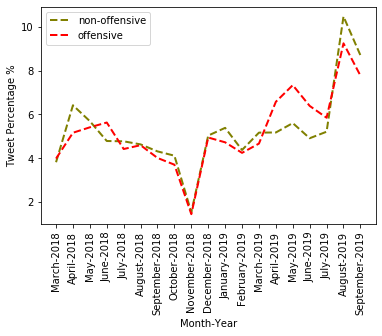

In [ ]:
plt.plot( cats, non_grouped["percent"] , marker='', color='olive', linewidth=2, linestyle='dashed', label="non-offensive")
plt.plot( cats, off_grouped["percent"] , marker='', color='red', linewidth=2, linestyle='dashed', label="offensive")
plt.xticks(rotation=90)
plt.ylabel("Tweet Percentage %")
plt.xlabel("Month-Year")
plt.legend()


In [ ]:
# Shapiro-Wilk Normality Test
stat, p = shapiro(non_offensive["word_count"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.850, p=0.000
Probably not Gaussian


C:\Users\hazal\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Example of the Mann-Whitney U Test

stat, p = mannwhitneyu(offensive["word_count"], non_offensive.sample(n=len(offensive.index))['word_count'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=18457139.000, p=0.000
Probably different distributions


C:\Users\hazal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hazal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

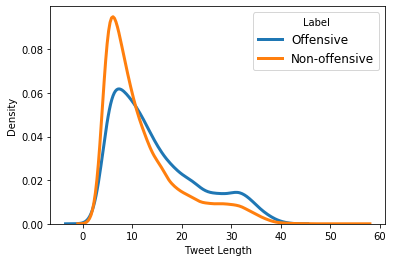

In [ ]:
# List of five airlines to plot
airlines = ['offensive', 'non-offensive']

# Draw the density plot
sns.distplot(offensive['word_count'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'Offensive')
sns.distplot(non_offensive['word_count'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'Non-offensive')

# Plot formatting
plt.legend(prop={'size': 12}, title = 'Label')
#plt.title('Density Plot for Length of Offensive and Non-offensive Tweets')
plt.xlabel('Tweet Length')
plt.ylabel('Density')

In [ ]:
non_offensive.agg({'word_count': ['count', 'min', 'max', 'mean', 'median', 'std', 'skew']})


,word_count
count,28439.000000
min,2.000000
max,55.000000
mean,11.967720
median,9.000000
std,7.705887
skew,1.365768


In [ ]:
offensive.agg({'word_count': ['count', 'min', 'max', 'mean', 'median', 'std', 'skew']})

,word_count
count,6845.000000
min,1.000000
max,41.000000
mean,14.809496
median,12.000000
std,8.657500
skew,0.869144


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tweets = [' '.join(twt_list) for twt_list in trcorpus_df["text_processed"]]
tfidfconverter = TfidfVectorizer(max_features= 2000, sublinear_tf=True, min_df=3, ngram_range=(1, 2), norm="l2")
X = tfidfconverter.fit_transform(tweets).toarray()
Y = trcorpus_df["label"]

C:\Users\hazal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hazal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Accuracy is:0.5345484148030758


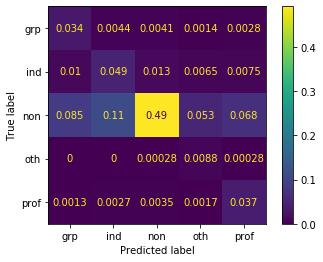

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from seqeval.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

CV = 5
kf = KFold(n_splits=CV, random_state=1, shuffle=True)
avg_f1 = 0
avg_acc = 0
model = LogisticRegression(random_state=0, class_weight = 'balanced')

bestmodel = model
best_acc = 0
best_X = []
best_Y = []

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]


    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    avg_acc += acc
    if acc > best_acc:
        best_acc = acc
        bestmodel = model
        best_X = X_test
        best_Y = y_test

    #avg_f1 += f1_score(y_test, y_pred)


print("Accuracy is:" + str(avg_acc/CV))
plot_confusion_matrix(bestmodel, best_X, best_Y, normalize='all')
plt.show()
#print("F1 is:" + str(avg_f1/CV))
